In [3]:
import numpy as np
from matplotlib import pyplot as plt
import math
plt.style.use('dark_background')

In [1]:
class MD:
    def __init__(self):
        self.particle_number = 500
        self.dimentions = 2
        self.pos = np.zeros((self.particle_number,self.dimentions))
        self.vel = np.zeros((self.particle_number,self.dimentions))  
        self.box = 300
        self.KB = 1 
        self.T = 1
        self.M =1
        self.eps = 1
        self.sigma = 1
        self.steps = 50
        self.step_time = 0.175
        self.mass = 1
        self.bins =17
    def position(self):
        self.pos = np.random.random_sample((self.particle_number,self.dimentions))*self.box
        return (self.pos)
#     position of particles defined randomly ,a sample output for 10 particles in 2 dimetions:
    def velocity(self):
        Average_velocity = math.sqrt(self.KB * self.T / self.M)
        self.vel = np.random.normal(loc=Average_velocity,scale = 0.1 ,size = ((self.particle_number,self.dimentions)))
        return (self.vel)       
#         since the relation average velocity = \frac{K T}{M} defines a average velocity of molecules. So we define molecular velocity
#         normally(gaussian) around average velocity with 0.1 spread 

    def force_pair(self,p1,p2):
        r = self.pos[p1] - self.pos[p2]
        r_mag = np.linalg.norm(r) 
        r_cap = r/r_mag
        f_mag = 24*self.eps/r_mag * (2*((self.sigma/r_mag)**12) - (self.sigma/r_mag)**6)
        return (f_mag * r_cap)
    
    def force_on_p(self,p):
        force = np.zeros(2)
        for i in range(self.particle_number):
            if (i == p):
                continue
            force += self.force_pair(p,i) 
        return force
    
    def integrate(self):
        for i in range(self.steps):
            forces = np.array([self.force_on_p(p) for p in range(self.particle_number)])
            self.pos = self.pos + self.vel * self.step_time
            for i in range(self.particle_number):
                if self.pos[i][0]<0 or self.pos[i][0]>self.box:
                    self.pos[i][0] = np.random.random_sample() *30
                if self.pos[i][1]<0 or self.pos[i][1]>self.box:
                    self.pos[i][1] = np.random.random_sample() *30
            self.vel = self.vel + (forces/self.mass) * self.step_time
        return self.pos
    
    def draw_particles(self):
        plt.figure(figsize=(5,5))
        axis = plt.gca()
        axis.set_xlim(-10,self.box+10)
        axis.set_ylim(-10,self.box+10)
        for i in range(self.particle_number):
            axis.add_patch( plt.Circle(self.pos[i], radius=5,linewidth=2, edgecolor='black') )
        plt.show()
        
    def radial_probabilty(self):
        particle = np.random.randint(1,self.particle_number)
        radial = []
        r = [self.box/2,self.box/2]
        for i in range(self.particle_number):
            r_sub = r - self.pos[i]
            d_sub = np.linalg.norm(r_sub) 
            if d_sub <= self.box/2 :
                radial.append(d_sub)
        f1,f2 = np.histogram(radial,bins=self.bins,density=False)
        r1 = np.linspace(0,self.box/2,self.bins+1)
        rq = []
        for i in range(len(r1)-1):
            rq = rq + [r1[i+1]**3 - r1[i]**3]
        r=[]
        for i in range (len(f2)-1):
            rz = f2[i] + (f2[i+1]-f2[i])/2
            r.append(rz)
        rq = np.array(rq)
        rdf = np.divide(f1,rq)
        plt.figure()
        plt.plot(r,rdf)
        plt.scatter(r,rdf)
        plt.ylabel('Number density of particles')
        plt.xlabel('radius(in nm)')
        plt.show()
#         return rq
#         return r

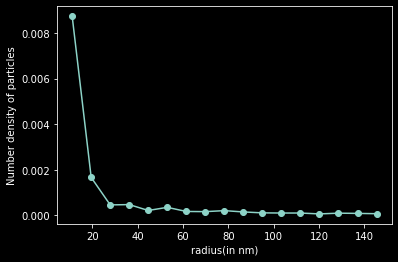

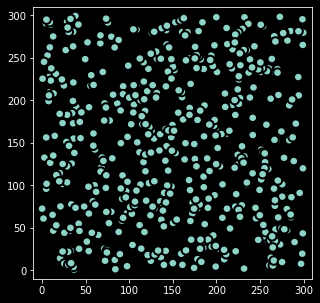

In [7]:
M=MD()
M.position()
M.velocity()
M.radial_probabilty()
M.draw_particles()

In [5]:
M.integrate()

array([[ 86.83416697,  83.49975025],
       [289.43128407, 297.48011719],
       [ 24.00471115,   1.03890147],
       [ 18.2010918 , 144.72949931],
       [114.15457386, 241.56305659],
       [239.11806899, 283.99081449],
       [201.64896284,  13.77542659],
       [ 57.82994737, 103.87787343],
       [ 24.38007005, 272.04164141],
       [ 70.31116919, 247.34418445],
       [  7.38388523,  24.14327871],
       [222.64032172, 110.98842775],
       [119.71655016, 149.63437919],
       [ 94.05028249,  66.92852025],
       [154.33194244,  17.52282061],
       [281.71007017, 215.17879627],
       [102.95265947, 283.92401364],
       [288.43156366,  33.86435042],
       [149.05273913,  40.3464    ],
       [124.25718347, 131.50355989],
       [278.30508821, 278.83568084],
       [176.40362939,  85.66954839],
       [ 27.72871777,   4.33432813],
       [256.17521349,  78.20901751],
       [ 26.92493013,  18.7399728 ],
       [299.85725021, 180.27193037],
       [155.74522549, 208.7329879 ],
 

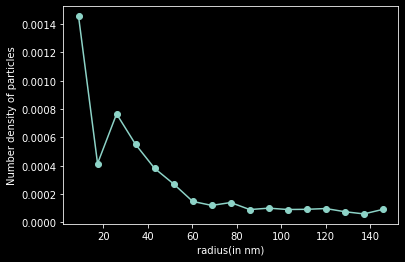

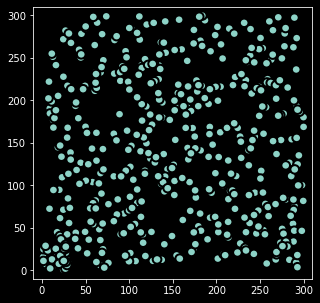

In [6]:
M.radial_probabilty()
M.draw_particles()